In [1]:
!pip install pivottablejs

In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pivottablejs import pivot_ui

In [3]:
df= pd.read_csv('E:/analysis of call center data/Call Center1.csv')

# Data Wrangling

In [4]:
df.head()

,id,customer_name,sentiment,csat_score,call_timestamp,reason,city,state,channel,response_time,call duration in minutes,call_center
0,DKK-57076809-w-055481-fU,Analise Gairdner,Neutral,7.0,10/29/2020,Billing Question,Detroit,Michigan,Call-Center,Within SLA,17,Los Angeles/CA
1,QGK-72219678-w-102139-KY,Crichton Kidsley,Very Positive,NaN,10/5/2020,Service Outage,Spartanburg,South Carolina,Chatbot,Within SLA,23,Baltimore/MD
2,GYJ-30025932-A-023015-LD,Averill Brundrett,Negative,NaN,10/4/2020,Billing Question,Gainesville,Florida,Call-Center,Above SLA,45,Los Angeles/CA
3,ZJI-96807559-i-620008-m7,Noreen Lafflina,Very Negative,1.0,10/17/2020,Billing Question,Portland,Oregon,Chatbot,Within SLA,12,Los Angeles/CA
4,DDU-69451719-O-176482-Fm,Toma Van der Beken,Very Positive,NaN,10/17/2020,Payments,Fort Wayne,Indiana,Call-Center,Within SLA,23,Los Angeles/CA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        32941 non-null  object 
 1   customer_name             32941 non-null  object 
 2   sentiment                 32941 non-null  object 
 3   csat_score                12271 non-null  float64
 4   call_timestamp            32941 non-null  object 
 5   reason                    32941 non-null  object 
 6   city                      32941 non-null  object 
 7   state                     32941 non-null  object 
 8   channel                   32941 non-null  object 
 9   response_time             32941 non-null  object 
 10  call duration in minutes  32941 non-null  int64  
 11  call_center               32941 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.0+ MB


## Csat score type is float64, we can change it to integer
## Call Time stamp is object while it is Date

In [6]:
df.isnull().sum()

id                              0
customer_name                   0
sentiment                       0
csat_score                  20670
call_timestamp                  0
reason                          0
city                            0
state                           0
channel                         0
response_time                   0
call duration in minutes        0
call_center                     0
dtype: int64

We have 20670 null values in Csat score so this column is useless, becasue it is more than 2/3 of the data

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['id', 'customer_name', 'sentiment', 'csat_score', 'call_timestamp',
       'reason', 'city', 'state', 'channel', 'response_time',
       'call duration in minutes', 'call_center'],
      dtype='object')

In [9]:
df.customer_name.nunique()

32941

In [10]:
df.id.nunique()

32941

# Data Cleaning

In [11]:
df['call_timestamp']= pd.to_datetime(df['call_timestamp'])

In [12]:
df= df.drop(['csat_score','id'], axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_name             32941 non-null  object        
 1   sentiment                 32941 non-null  object        
 2   call_timestamp            32941 non-null  datetime64[ns]
 3   reason                    32941 non-null  object        
 4   city                      32941 non-null  object        
 5   state                     32941 non-null  object        
 6   channel                   32941 non-null  object        
 7   response_time             32941 non-null  object        
 8   call duration in minutes  32941 non-null  int64         
 9   call_center               32941 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 2.5+ MB


In [14]:
df.isnull().sum()

customer_name               0
sentiment                   0
call_timestamp              0
reason                      0
city                        0
state                       0
channel                     0
response_time               0
call duration in minutes    0
call_center                 0
dtype: int64

# Data Analysis

In [15]:
df.describe(include='object').T

,count,unique,top,freq
customer_name,32941,32941,Analise Gairdner,1
sentiment,32941,5,Negative,11063
reason,32941,3,Billing Question,23462
city,32941,461,Washington,1110
state,32941,51,California,3631
channel,32941,4,Call-Center,10639
response_time,32941,3,Within SLA,20625
call_center,32941,4,Los Angeles/CA,13734


# Observations:
1- Most of the response time is within SLA.

2- We have high negative sentiments, we need to check why.

3- More than 2/3 of the reasons are Billing Questions.

4- The most used channel is the Call center.

5- Los Angeles/CA has the highest calls.

# We need to create new columns for days of the week, and days of the month to get the most rush days in the week and in the month.

In [16]:
df['day_in_the_week'] = df.call_timestamp.dt.day_name()

In [17]:
df['day_in_the_month']= df.call_timestamp.dt.day

In [25]:
pivot_ui(df)

# Q1- What the most frequesnt reason of calls?

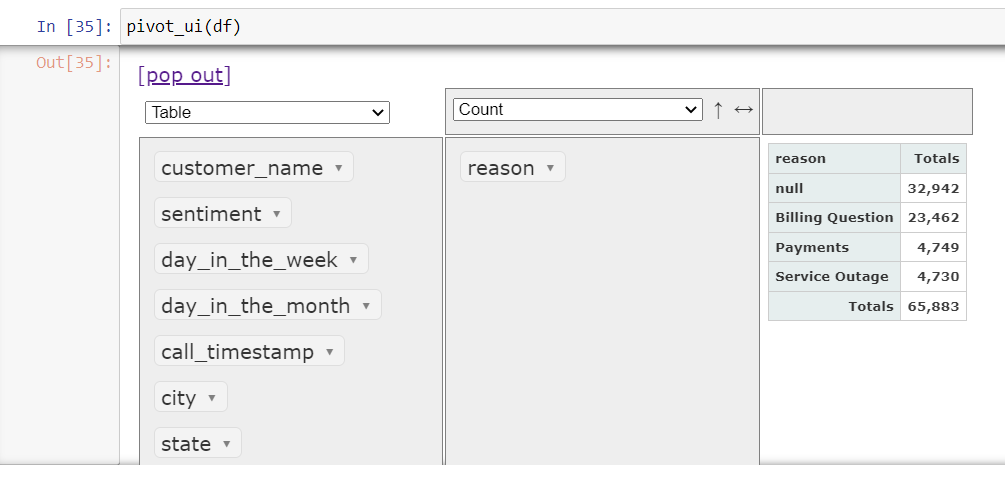

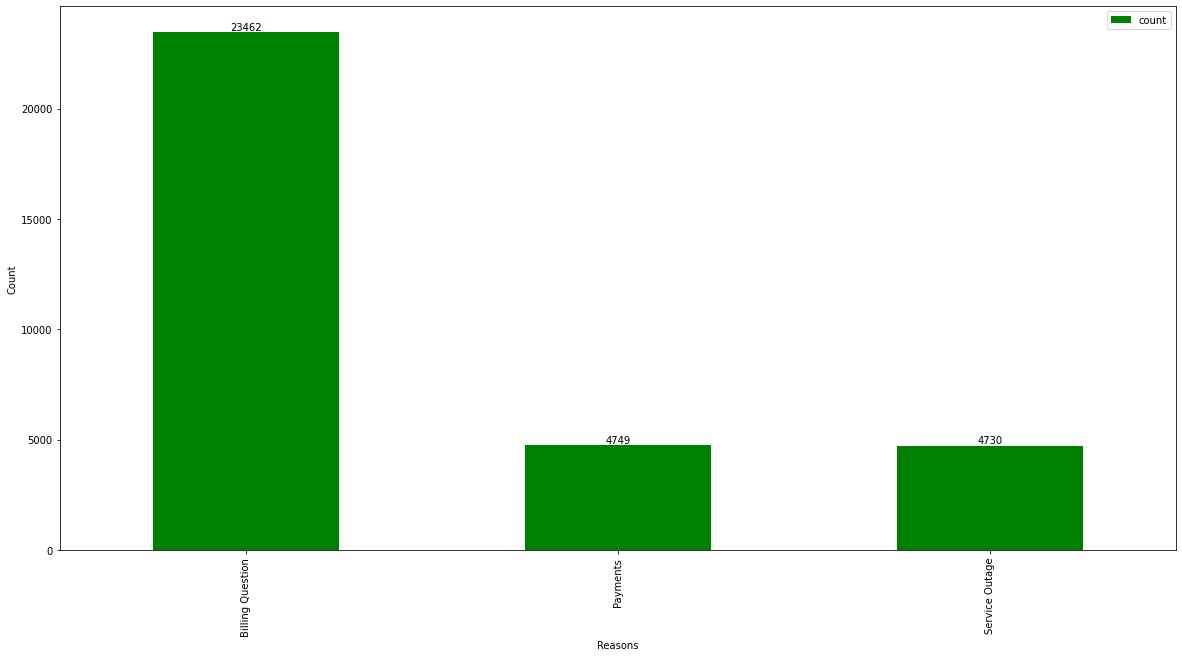

In [19]:
grouped_df = df.groupby('reason').size().to_frame("count").reset_index()

fig= grouped_df.plot(figsize=(20,10),kind='bar', x='reason', y='count',color = 'green', xlabel='Reasons', ylabel= 'Count')

fig.bar_label(fig.containers[0], label_type='edge');


plt.show();

# Most inquiries are about Billing Questions, the other reasons roughly are the same

# Q2- What are the most rush days in the week? 

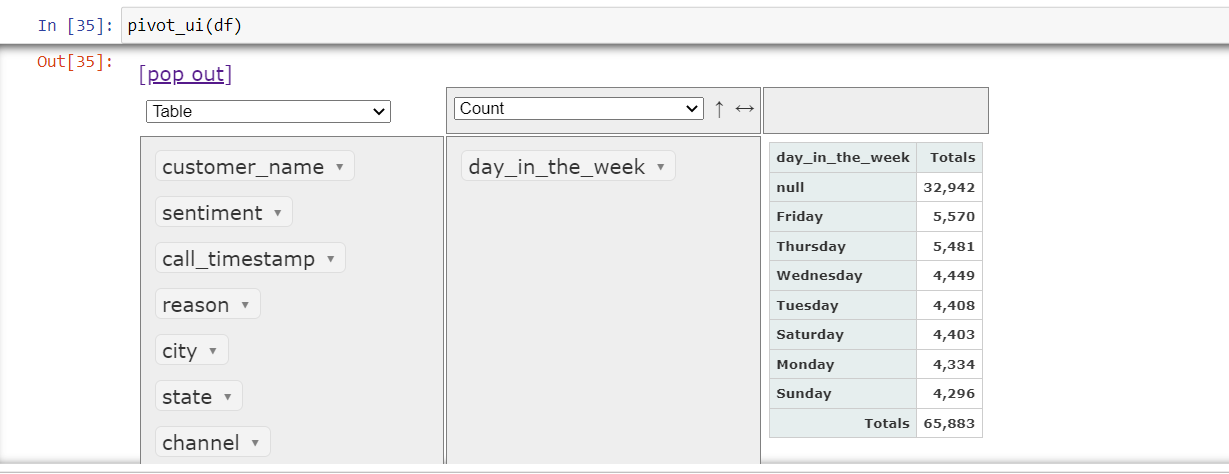

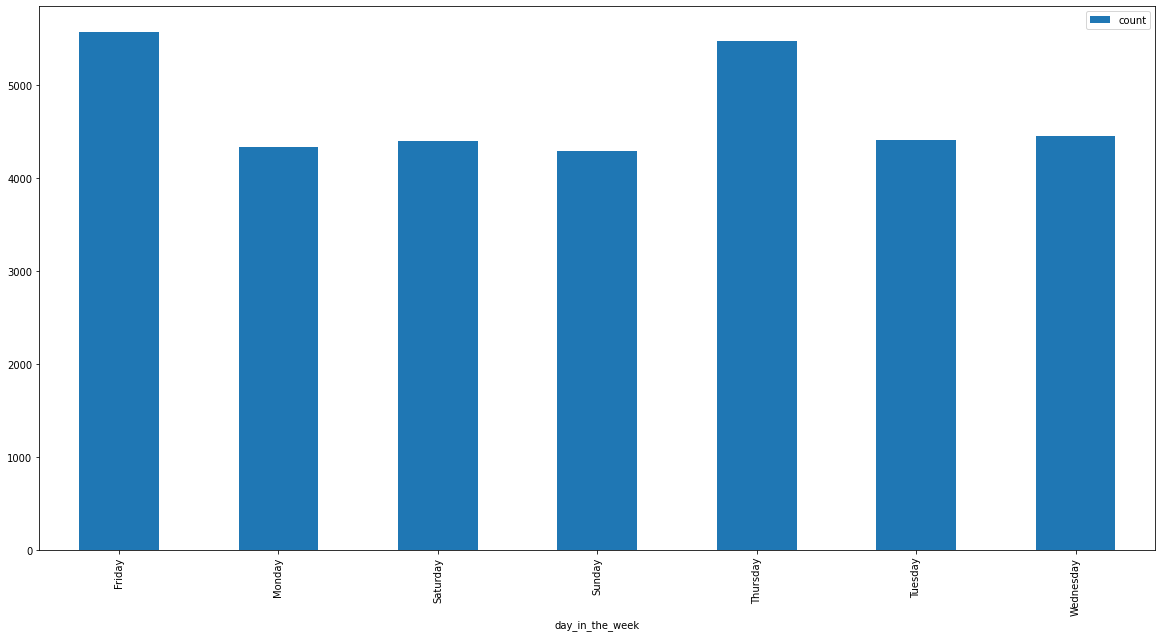

In [20]:
grouped_df = df.groupby('day_in_the_week').size().to_frame("count").reset_index()

grouped_df.plot(figsize=(20,10),kind='bar', x='day_in_the_week', y='count');

# The highest days in receiving calls are Friday, Thursday, while the lowest day is Sunday. 



# Q3- What is the most rush day in the month? 

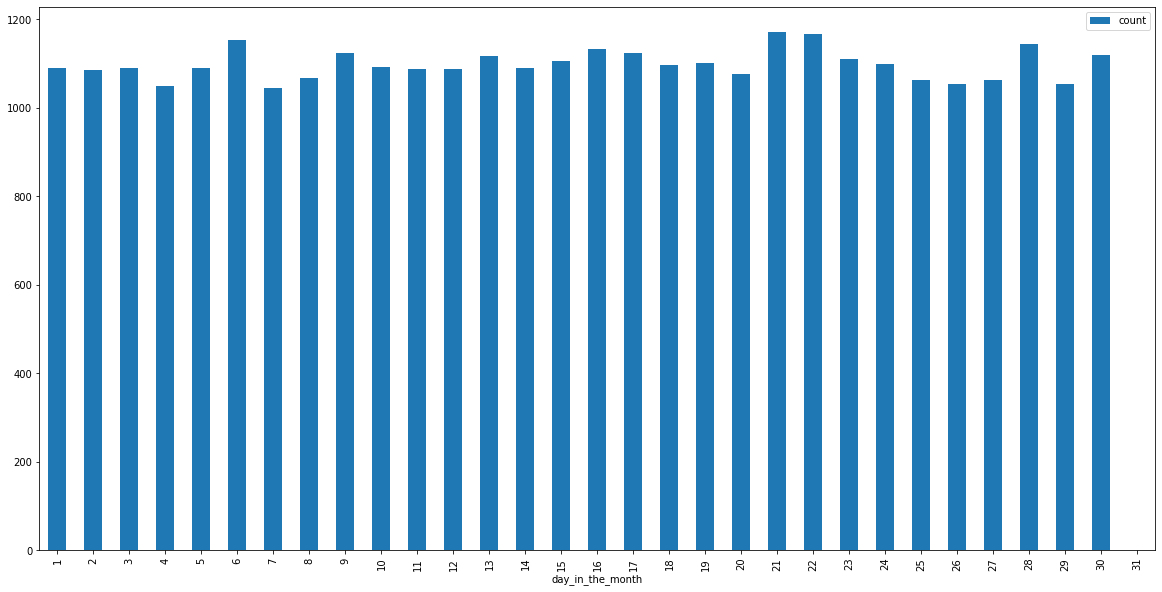

In [21]:
grouped_df = df.groupby('day_in_the_month').size().to_frame("count").reset_index()

grouped_df.plot(figsize=(20,10),kind='bar', x='day_in_the_month', y='count');

# There is no significant difference between them.

In [22]:
df.head()

,customer_name,sentiment,call_timestamp,reason,city,state,channel,response_time,call duration in minutes,call_center,day_in_the_week,day_in_the_month
0,Analise Gairdner,Neutral,2020-10-29,Billing Question,Detroit,Michigan,Call-Center,Within SLA,17,Los Angeles/CA,Thursday,29
1,Crichton Kidsley,Very Positive,2020-10-05,Service Outage,Spartanburg,South Carolina,Chatbot,Within SLA,23,Baltimore/MD,Monday,5
2,Averill Brundrett,Negative,2020-10-04,Billing Question,Gainesville,Florida,Call-Center,Above SLA,45,Los Angeles/CA,Sunday,4
3,Noreen Lafflina,Very Negative,2020-10-17,Billing Question,Portland,Oregon,Chatbot,Within SLA,12,Los Angeles/CA,Saturday,17
4,Toma Van der Beken,Very Positive,2020-10-17,Payments,Fort Wayne,Indiana,Call-Center,Within SLA,23,Los Angeles/CA,Saturday,17


In [23]:
pivot_ui(df)

# Q4- What are the evaluation of each channel?

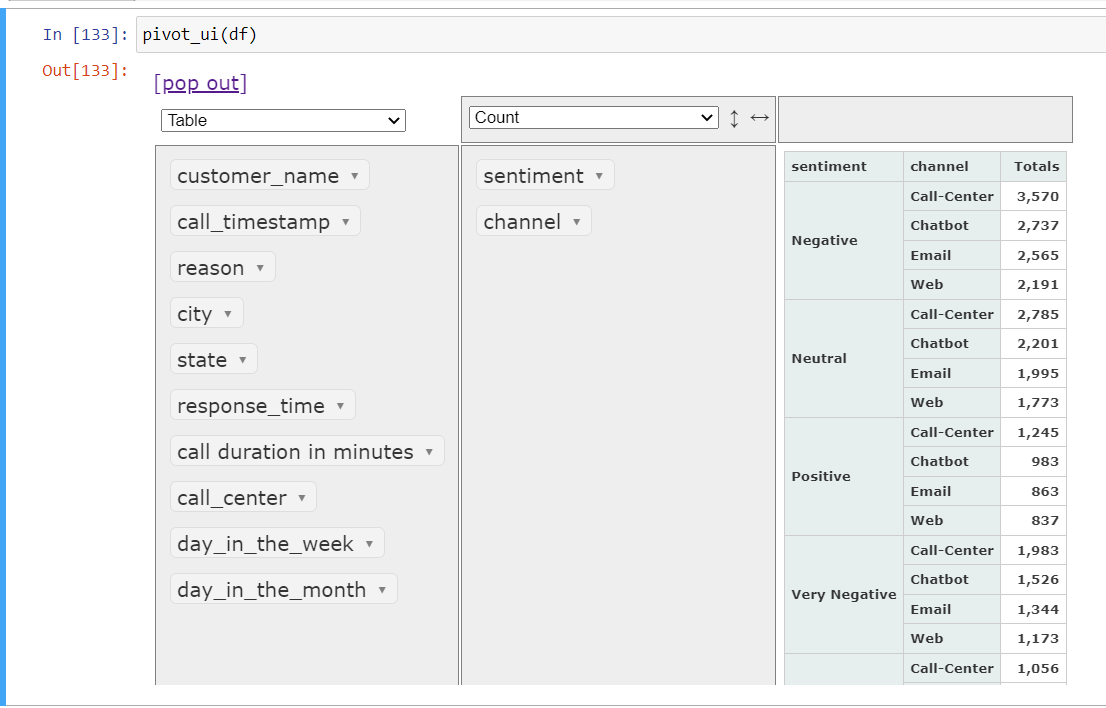

# Most of the evaluations are Negative for the whole channels